In [1]:
# import statements for all packages needed in this project.

import pandas as pd
import numpy as np
import requests
import tweepy
import json
import matplotlib.pyplot as plt


## Gathering Data

### Twitter archive Data

In [2]:
#load Twitter Archive Enhanced file as Pandas DataFrame .

df_archive = pd.read_csv('twitter-archive-enhanced.csv')


### Image Predictions Data 

In [3]:
# Download URL using  Requests

url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
response

<Response [200]>

In [4]:
# open new file and save the URL content to that file.

with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)

# load tsv file as a Pandas DataFrame .   
df_image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')

### Tweets Data (Twitter API)

In [5]:
# Access Twitter's API and hide my witter credentials .

consumer_key = 'xxxxxxxxxxx'
consumer_secret = 'xxxxxxxxxxx'
access_token = 'xxxxxxxxxxx'
access_secret = 'xxxxxxxxxxx'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

# Create API varible with rate limit .
api = tweepy.API(auth)

In [6]:
# new variable contain the list of tweet ids in  df_archive DF. 

tweet_ids = df_archive.tweet_id.values

# Open new file (tweet_json.txt) to save JSON data that query with Twitter's API.

with open('tweet_json.txt', 'w') as file:
    for tweet_id in tweet_ids:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, file)
            file.write('\n')
        except tweepy.TweepError:
            print('Missing Tweet')
           

Missing Tweet
Missing Tweet
Missing Tweet
Missing Tweet
Missing Tweet
Missing Tweet
Missing Tweet
Missing Tweet
Missing Tweet
Missing Tweet
Missing Tweet
Missing Tweet
Missing Tweet
Missing Tweet
Missing Tweet
Missing Tweet
Missing Tweet
Missing Tweet
Missing Tweet
Missing Tweet
Missing Tweet
Missing Tweet
Missing Tweet
Missing Tweet
Missing Tweet
Missing Tweet
Missing Tweet
Missing Tweet
Missing Tweet
Missing Tweet
Missing Tweet
Missing Tweet
Missing Tweet
Missing Tweet
Missing Tweet
Missing Tweet
Missing Tweet
Missing Tweet
Missing Tweet
Missing Tweet
Missing Tweet
Missing Tweet
Missing Tweet
Missing Tweet
Missing Tweet
Missing Tweet
Missing Tweet
Missing Tweet
Missing Tweet
Missing Tweet
Missing Tweet
Missing Tweet
Missing Tweet
Missing Tweet
Missing Tweet
Missing Tweet
Missing Tweet
Missing Tweet
Missing Tweet
Missing Tweet
Missing Tweet
Missing Tweet
Missing Tweet
Missing Tweet
Missing Tweet
Missing Tweet
Missing Tweet
Missing Tweet
Missing Tweet
Missing Tweet
Missing Tweet
Missin

In [6]:
# Converting JSON data to DataFrame .

df_json =pd.read_json('tweet_json.txt', lines = True)


In [7]:
# Copying slected columns needed to new DataFrame .

df_tweet = df_json[['id', 'retweet_count', 'favorite_count']].copy()

## Assessing Data

### Twitter archive

In [8]:
# View frist 5 rows Twitter archive Data Frame
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [9]:
# View random 5 rows Twitter archive Data Frame.
df_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2005,672272411274932228,NaN,NaN,2015-12-03 04:33:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pippin. He is terrified of his new lit...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672272411...,11,10,Pippin,None,None,None,None
140,865006731092295680,NaN,NaN,2017-05-18 00:50:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Nelly. He really hopes you like his Ha...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/865006731...,13,10,Nelly,None,None,None,None
1717,680191257256136705,NaN,NaN,2015-12-25 01:00:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a sleepy Christmas pupper 11/10 https:/...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680191257...,11,10,None,None,None,pupper,None
1970,673295268553605120,NaN,NaN,2015-12-06 00:17:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Eve. She's a raging alcoholic 8/10 (would...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673295268...,8,10,Eve,None,None,pupper,None
1332,705475953783398401,NaN,NaN,2016-03-03 19:32:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Zara. She found a sandal and coul...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/705475953...,12,10,Zara,None,None,None,None


In [10]:
# View last 5 rows Twitter archive Data Frame.
df_archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [11]:
# Display info about Twitter archive Data Frame
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
# Display statistics data for raiting columns .

df_archive[['rating_numerator','rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [13]:
# Finding numbers belwo 10 in rating_numerator column.

df_archive[df_archive.rating_numerator < 10 ]['rating_numerator'].value_counts()


9    158
8    102
7     55
5     37
6     32
3     19
4     17
2      9
1      9
0      2
Name: rating_numerator, dtype: int64

In [14]:
# Total numbers belwo 10 in rating_numerator column.

df_archive[df_archive.rating_numerator < 10 ]['rating_numerator'].value_counts().sum()

440

In [15]:
# finding numbers above  10 in rating_numerator column.

df_archive[df_archive.rating_numerator > 10 ]['rating_numerator'].value_counts().sort_index()



11      464
12      558
13      351
14       54
15        2
17        1
20        1
24        1
26        1
27        1
44        1
45        1
50        1
60        1
75        2
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
182       1
204       1
420       2
666       1
960       1
1776      1
Name: rating_numerator, dtype: int64

In [16]:
# Total numbers above  10 in rating_numerator column.

df_archive[df_archive.rating_numerator > 10 ]['rating_numerator'].value_counts().sum()

1455

In [17]:
#  count numbers above 14 in rating_numerator column.

df_archive[df_archive.rating_numerator > 14 ]['rating_numerator'].value_counts().sum()


28

In [18]:
# find and count numbers that not = 10 in rating_denominator column.

df_archive[df_archive.rating_denominator != 10 ]['rating_denominator'].value_counts()

50     3
11     3
20     2
80     2
90     1
40     1
130    1
2      1
70     1
7      1
110    1
170    1
120    1
15     1
16     1
150    1
0      1
Name: rating_denominator, dtype: int64

In [19]:
# Check rating from the text column  by extracting the rating RegEXr .
ratings = df_archive.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)

print(ratings[0].value_counts()) # numerator
print(ratings[1].value_counts()) # denominator

12       558
11       464
10       461
13       351
9        158
8        102
14        54
7         54
5         35
6         32
3         19
4         17
2          9
1          9
420        2
0          2
9.75       2
15         2
144        1
11.26      1
44         1
204        1
20         1
17         1
45         1
80         1
9.5        1
121        1
182        1
960        1
88         1
143        1
165        1
84         1
13.5       1
99         1
11.27      1
50         1
666        1
1776       1
007        1
24         1
60         1
Name: 0, dtype: int64
10     2333
50        3
11        3
20        2
80        2
00        1
90        1
7         1
40        1
170       1
120       1
110       1
150       1
70        1
16        1
2         1
15        1
130       1
Name: 1, dtype: int64


In [20]:
# Check names that not start with Capital letter in name column.

lowercase_names= df_archive.loc[(df_archive['name'].str.islower())]
lowercase_names['name'].value_counts()


a               55
the              8
an               7
very             5
just             4
quite            4
one              4
getting          2
actually         2
not              2
mad              2
life             1
by               1
officially       1
such             1
incredibly       1
infuriating      1
light            1
my               1
space            1
his              1
old              1
unacceptable     1
this             1
all              1
Name: name, dtype: int64

In [21]:
# Total number of names with starting with lowercaes 

lowercase_names['name'].value_counts().sum()

109

In [22]:
# Check 'None' in name column.

df_archive[df_archive.name =='None']['name'].value_counts()

None    745
Name: name, dtype: int64

In [23]:
# Check for duplications in tweet_id column.

df_archive.tweet_id.duplicated().sum()

0

In [24]:
# Check for null and empty valuse in expanded_urls column.

df_archive['expanded_urls'].isnull().sum()

59

In [25]:
# Show rows that are retweeted in DF .

df_archive[df_archive.retweeted_status_id.notnull()]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


In [26]:
# The total number of retweeted in DF .

df_archive['retweeted_status_id'].notnull().sum()

181

In [27]:
df_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [28]:
# Check if multiple dog stages in a row.

df_archive.groupby(["doggo", "floofer", "pupper", "puppo"]).size().reset_index().rename(columns={0: "count"})

,doggo,floofer,pupper,puppo,count
0,None,None,None,None,1976
1,None,None,None,puppo,29
2,None,None,pupper,None,245
3,None,floofer,None,None,9
4,doggo,None,None,None,83
5,doggo,None,None,puppo,1
6,doggo,None,pupper,None,12
7,doggo,floofer,None,None,1


### Image Predictions

In [29]:
# View frist 5 rows Image Predictions Data Frame

df_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [30]:
# View last 5 rows Image Predictions Data Frame

df_image_predictions.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [31]:
# Display info about Image Predictions Data Frame
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [32]:
# Display statistics data for Image Predictions Data Frame .

df_image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [33]:
df_image_predictions.tweet_id.duplicated().value_counts()

False    2075
Name: tweet_id, dtype: int64

In [34]:
df_image_predictions.p1_conf.duplicated().value_counts()

False    2006
True       69
Name: p1_conf, dtype: int64

In [35]:
df_image_predictions.jpg_url.duplicated().value_counts()

False    2009
True       66
Name: jpg_url, dtype: int64

In [36]:
# Find rows that failed to predict in the p1 , p2 and p3.

df_image_predictions.loc[(df_image_predictions['p1_dog'] == False) & (df_image_predictions['p2_dog'] == False) & (df_image_predictions['p3_dog']== False)]



,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,4.588540e-02,False,terrapin,1.788530e-02,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,3.391940e-02,False,partridge,5.206580e-05,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,8.554740e-02,False,bookcase,7.947970e-02,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,1.525000e-02,False,great_grey_owl,1.320720e-02,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,2.402450e-03,False,hamster,4.608630e-04,False
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,2.714850e-01,False,gar,1.899450e-01,False
45,666786068205871104,https://pbs.twimg.com/media/CUDmZIkWcAAIPPe.jpg,1,snail,0.999888,False,slug,5.514170e-05,False,acorn,2.625800e-05,False
50,666837028449972224,https://pbs.twimg.com/media/CUEUva1WsAA2jPb.jpg,1,triceratops,0.442113,False,armadillo,1.140710e-01,False,common_iguana,4.325530e-02,False
51,666983947667116034,https://pbs.twimg.com/media/CUGaXDhW4AY9JUH.jpg,1,swab,0.589446,False,chain_saw,1.901420e-01,False,wig,3.450970e-02,False
53,667012601033924608,https://pbs.twimg.com/media/CUG0bC0U8AAw2su.jpg,1,hyena,0.987230,False,African_hunting_dog,1.260080e-02,False,coyote,5.735010e-05,False


### Tweets 

In [37]:
# View frist 5 rows Tweets Data Frame.

df_tweet.head()

,id,retweet_count,favorite_count
0,798576900688019456,6265,0
1,798340744599797760,3602,0
2,798209839306514432,2740,10945
3,797971864723324932,3359,12266
4,797545162159308800,5197,15315


In [38]:
# View last 5 rows Tweets Data Frame.

df_tweet.tail()

,id,retweet_count,favorite_count
892,692158366030913536,816,2205
893,692142790915014657,410,1692
894,692041934689402880,1319,3496
895,692017291282812928,995,2948
896,691820333922455552,1731,4064


In [39]:
# Display info about Tweets Data Frame

df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 897 entries, 0 to 896
Data columns (total 3 columns):
id                897 non-null int64
retweet_count     897 non-null int64
favorite_count    897 non-null int64
dtypes: int64(3)
memory usage: 21.1 KB


In [40]:
# Display statistics data for Tweet Data Frame .

df_tweet.describe()

,id,retweet_count,favorite_count
count,8.970000e+02,897.000000,897.000000
mean,7.404558e+17,2844.429208,6752.264214
std,3.243369e+16,4735.306710,9273.827992
min,6.918203e+17,2.000000,0.000000
25%,7.088343e+17,919.000000,2741.000000
50%,7.421612e+17,1585.000000,4398.000000
75%,7.686096e+17,3043.000000,7845.000000
max,7.985769e+17,81692.000000,161530.000000


### Quality Issues :

#####  Twitter archive table

1. There 109 dog names in archive dats starting with small letter (a,an,very,this,all,not, etc.) not a name of dog and need to replace to None.<br/>


2. The actuall ratings in tweet text contain decimal value that not reflect in  numerator column.

3. Multiple values with the rating denominator Not equale 10 , need to be removed.<br/>


4. There are 28 out 1455 cases ,numerator numbers exceeding 14 that some of them exaggerated numbers from 50 to 1776 in rating
and other between 14 and 50 .Since these numbers ouccred once or twise in the rating will not affect the overall amd will be remoevd.<br/>
 


5. 59 of missing URLS in expanded_urls , that is mean some raitings with no image, these cases will be removed.<br/>

6. Source data need to convert to readable words instade of URLs that not easy to read:<br/>
           (Twitter for iPhone - Vine - Twitter Web Client - TweetDeck).


7. 181 retweeted that leads to duplicate the original tweet rating in DF.  


8. Six data columns not realted to this analysis will be removed.


(in_reply_to_status_id,in_reply_to_user_id,timestamp,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp)<br/>


##### Image Predictions table

9. Multiple data in the all three perdictions columns that fail to predict dog  in same image .
       
           

##### Tweets table 

10. The id column need to be rename and match the id felids name in other data frams 'tweet_id'. 

### Tidiness Issues :

1. The last four columns (doggo, floofer,pupper,puppo) should be one colomn .
     

* There are "None" as value in the last four columns (dog stages columns) needs to be corrected to null objects .
* There 14 cases that include more than one dog stages ( doggo ,floofer ),(dogge , pupper) and (dogge , puppo) becuase that image inculde 2 dogs.

2. All three resouces should merge in one Data Frame since they have tweet ids as refrence in each tables.

## Cleaning Data

In [41]:
# Copy Data Frams for cleaning puepose and not affted the original data.

df_archive_clean = df_archive.copy()
df_image_predictions_clean = df_image_predictions.copy()
df_tweet_clean = df_tweet.copy()


### Cleaning Quality  Issues

#####  (Twitter archive)

#### Define

 1. Replace all dog names staring with small letters to "None"

#### Code

In [42]:
# Show the total number of 'None' beofe replacing  
df_archive_clean[df_archive_clean.name =='None']['name'].value_counts()

None    745
Name: name, dtype: int64

In [43]:
# Replaing name caeses to 'None' .

names_lower= df_archive_clean.loc[(df_archive_clean['name'].str.islower())].index


df_archive_clean.loc[names_lower, 'name'] = "None"


#### Test

In [44]:
# Check name column in the clean DF if still contains names starting with small letter
lowercase_test= df_archive_clean.loc[(df_archive_clean['name'].str.islower())]
lowercase_test['name'].value_counts()

Series([], Name: name, dtype: int64)

In [45]:
# The total number of 'None' increaed by 109 .

df_archive_clean[df_archive_clean.name =='None']['name'].value_counts()

None    854
Name: name, dtype: int64

#### Define

2. Updating rating numerator and denominators columns with actual raiting in text column to fix rating numerator column that not extract the decimal value.

#### Code

In [46]:


# extract rating from the text .

ratings = df_archive_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)

# Update  Existing ratings columns with extratcted ratings that extracted from text to correct decimal ratings .

df_archive_clean.loc[:, 'rating_numerator'] = ratings[0]
df_archive_clean.loc[:, 'rating_denominator'] = ratings[1]

# convert datatype for ratings columns to float in the clean DF.

df_archive_clean[['rating_numerator', 'rating_denominator']] = df_archive_clean[['rating_numerator','rating_denominator']].astype(float)


# Check the data types for both columns.

print(df_archive_clean.rating_numerator.dtype)
print(df_archive_clean.rating_denominator.dtype)


float64
float64


#### Test

In [47]:
# check Updating columns (rating_numerator,rating_denominator)

print(df_archive_clean.rating_numerator.value_counts())
print(df_archive_clean.rating_denominator.value_counts())


12.00      558
11.00      464
10.00      461
13.00      351
9.00       158
8.00       102
7.00        55
14.00       54
5.00        35
6.00        32
3.00        19
4.00        17
2.00         9
1.00         9
0.00         2
420.00       2
9.75         2
15.00        2
960.00       1
84.00        1
24.00        1
17.00        1
13.50        1
143.00       1
121.00       1
80.00        1
182.00       1
165.00       1
45.00        1
204.00       1
1776.00      1
666.00       1
99.00        1
11.27        1
11.26        1
88.00        1
144.00       1
9.50         1
20.00        1
44.00        1
60.00        1
50.00        1
Name: rating_numerator, dtype: int64
10.0     2333
11.0        3
50.0        3
20.0        2
80.0        2
110.0       1
0.0         1
15.0        1
7.0         1
150.0       1
16.0        1
120.0       1
2.0         1
170.0       1
70.0        1
130.0       1
90.0        1
40.0        1
Name: rating_denominator, dtype: int64


#### Define

3. Drop rows that denominator Not equale 10 .

####  Code

In [48]:
# Delete rows from clean dataFrame that not = 10 in rating_denominator column.

not_ten = df_archive_clean[df_archive_clean.rating_denominator != 10 ].index

df_archive_clean.drop(not_ten , inplace=True)

#### Test

In [49]:
# Checking clean DF if there are denominators  not = 10 .

df_archive_clean[df_archive_clean.rating_denominator != 10 ].index

Int64Index([], dtype='int64')

#### Define

4. Drop rows that numerators greater than 14

#### Code

In [50]:
# Delet index wih condition  rating_numerator > 14 .

numerators_above_14 = df_archive_clean[(df_archive_clean['rating_numerator'] > 14)].index
df_archive_clean.drop( numerators_above_14 , inplace=True)

#### Test

In [51]:
# Check the numerator > 14 still excited .

df_archive_clean[df_archive_clean.rating_numerator > 14 ]['rating_numerator'].value_counts()

Series([], Name: rating_numerator, dtype: int64)

#### Define

5. Removing missing URLS in expanded_urls in the clean DF.


#### Code

In [52]:
# check the total missing images in the clean DF.

df_archive_clean['expanded_urls'].isnull().value_counts()

False    2275
True       50
Name: expanded_urls, dtype: int64

In [53]:
# 41 missing images in the clean DF will be droped .

df_archive_clean = df_archive_clean.dropna(subset=['expanded_urls'])

#### Test

In [54]:
# Checking the null images .

df_archive_clean['expanded_urls'].isnull().sum()

0

#### Define

6. Replacing URLs in source column to source name :<br/>
  -Twitter for iPhone<br/>  - Vine Vine - Make a Scene<br/> - Twitter Web Client<br/> - TweetDeck.<br/>

#### Code

In [55]:
# Show the URLS with corresponding source name for each URL. 
df_archive_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2142
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       32
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      10
Name: source, dtype: int64

In [56]:
# Replace URL to source name 

df_archive_clean['source']= df_archive_clean['source'].replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>','Twitter for iPhone')
df_archive_clean['source']= df_archive_clean['source'].replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>' ,'Vine - Make a Scene')
df_archive_clean['source']= df_archive_clean['source'].replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>','Twitter Web Client')
df_archive_clean['source']= df_archive_clean['source'].replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>','TweetDeck')
                

#### Test

In [57]:
# Check the source names in the clean DF .

df_archive_clean.source.value_counts()

Twitter for iPhone     2142
Vine - Make a Scene      91
Twitter Web Client       32
TweetDeck                10
Name: source, dtype: int64

#### Define

7. Delet all rows that retweets is valid . 

#### Code

In [58]:
# check the total retweets existed in the clean DF.

df_archive_clean['retweeted_status_id'].notnull().sum()

178

In [59]:
# Drop all rows that are retweets.

retweet= df_archive_clean.loc[(df_archive_clean['retweeted_status_id'].notnull())].index

df_archive_clean.drop(retweet, inplace=True)

#### Test

In [60]:
# checking retweets after cleaning.  
df_archive_clean['retweeted_status_id'].notnull().sum()

0

#### Define

8. Removing columns that no needed in this analysis. 

#### Code

In [61]:
# Drop unnessory columns in the clean DF.

df_archive_clean.drop(['retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp', 'in_reply_to_status_id',
               'in_reply_to_user_id', 'in_reply_to_user_id','timestamp'], axis=1, inplace=True)

#### Test

In [62]:
# Check the columns deleted in clean DF.

df_archive_clean.head(0)

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


##### (Image Predictions)

#### Define

9. Remove when all predictions type fail to predicte that image is dog .

#### Code


In [63]:
# Drop all row that all predictions False (= False in  p1_dog , p2_dog and p3_dog)

not_dog = df_image_predictions_clean[(df_image_predictions_clean['p1_dog'] == False) & (df_image_predictions_clean['p2_dog'] == False) & (df_image_predictions_clean['p3_dog']== False)].index

df_image_predictions_clean.drop(not_dog , inplace=True)


#### Test

In [64]:
 # Check the fales predictions in all predictions False .
    
df_image_predictions_clean[(df_image_predictions_clean['p1_dog'] == False) & (df_image_predictions_clean['p2_dog'] == False) & (df_image_predictions_clean['p3_dog']== False)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


##### (Tweet)

#### Define

10. Rename column 'id' to 'tweet_id' to meger al data frams in master frame .

#### Code

In [65]:
# Rename to id to tweet id .

df_tweet_clean.rename({'id':'tweet_id'}, axis=1 , inplace=True)

#### Test

In [66]:
# Dispaly the the columns of the clean Df.

df_tweet_clean.head(0)

,tweet_id,retweet_count,favorite_count


### Cleaning Tidiness Issues

#### Define

1- The last four columns (doggo, floofer,pupper,puppo) should be one colomn .

#### Code




In [67]:
# Convert "None" values  in the last 4 (dog stages) columns to empty string .

df_archive_clean.doggo.replace('None', '', inplace=True)
df_archive_clean.floofer.replace('None', '', inplace=True)
df_archive_clean.pupper.replace('None', '', inplace=True)
df_archive_clean.puppo.replace('None', '', inplace=True)

# combine 4 stages columns to new column 'dog_stage' added to clean DF.

df_archive_clean['dog_stage'] = df_archive_clean.doggo + df_archive_clean.floofer + df_archive_clean.pupper + df_archive_clean.puppo

# after combining ,need to split 2 dogs by comma  ',' .

df_archive_clean.loc[df_archive_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
df_archive_clean.loc[df_archive_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
df_archive_clean.loc[df_archive_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

# Removing empty object '' in dog_stage 

none = df_archive_clean[df_archive_clean.dog_stage == '' ].index


df_archive_clean.drop(none , inplace=True)

#  # Drop 4 columns (doggo,floofer,pupper and puppo) in the clean DF

df_archive_clean.drop(['doggo', 'floofer','pupper', 'puppo'], axis=1, inplace=True)
                       
                

#### Test

In [68]:
# check the column name and orders in the clean DF after combine 4 columns to new one .

df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338 entries, 9 to 2017
Data columns (total 8 columns):
tweet_id              338 non-null int64
source                338 non-null object
text                  338 non-null object
expanded_urls         338 non-null object
rating_numerator      338 non-null float64
rating_denominator    338 non-null float64
name                  338 non-null object
dog_stage             338 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 23.8+ KB


In [69]:
# Show that None and empty string are remove , also check the two dogs cases split with comma .

df_archive_clean.dog_stage.value_counts()

pupper            222
doggo              72
puppo              23
doggo, pupper      10
floofer             9
doggo, floofer      1
doggo, puppo        1
Name: dog_stage, dtype: int64

#### Define

2- Merging all clean data frams to one master data fram. 

#### Code

In [70]:
# Merge df_archive_clean and df_image_predictions_clean 

merge2 = pd.merge(df_archive_clean,df_image_predictions_clean, on='tweet_id', how='outer')

merge2.head()

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,890240255349198849,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.0,10.0,Cassie,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1.0,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True
1,889665388333682689,Twitter for iPhone,Here's a puppo that seems to be on the fence a...,https://twitter.com/dog_rates/status/889665388...,13.0,10.0,None,puppo,https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg,1.0,Pembroke,0.966327,True,Cardigan,0.027356,True,basenji,0.004633,True
2,889531135344209921,Twitter for iPhone,This is Stuart. He's sporting his favorite fan...,https://twitter.com/dog_rates/status/889531135...,13.0,10.0,Stuart,puppo,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg,1.0,golden_retriever,0.953442,True,Labrador_retriever,0.013834,True,redbone,0.007958,True
3,886366144734445568,Twitter for iPhone,This is Roscoe. Another pupper fallen victim t...,https://twitter.com/dog_rates/status/886366144...,12.0,10.0,Roscoe,pupper,https://pbs.twimg.com/media/DE0BTnQUwAApKEH.jpg,1.0,French_bulldog,0.999201,True,Chihuahua,0.000361,True,Boston_bull,0.000076,True
4,884162670584377345,Twitter for iPhone,Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,12.0,10.0,Yogi,doggo,https://pbs.twimg.com/media/DEUtQbzW0AUTv_o.jpg,1.0,German_shepherd,0.707046,True,malinois,0.199396,True,Norwegian_elkhound,0.049148,True


In [71]:
# Merge both merge DFs with the third Df (df_tweet_clean). 

master_clean = pd.merge(merge2,df_tweet_clean, on='tweet_id', how='outer')



#### Test

In [72]:
# Show the master merge DF and check all coulmns in the master Df.

master_clean 

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,890240255349198849,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.0,10.0,Cassie,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1.0,...,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,NaN,NaN
1,889665388333682689,Twitter for iPhone,Here's a puppo that seems to be on the fence a...,https://twitter.com/dog_rates/status/889665388...,13.0,10.0,None,puppo,https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg,1.0,...,0.966327,True,Cardigan,0.027356,True,basenji,0.004633,True,NaN,NaN
2,889531135344209921,Twitter for iPhone,This is Stuart. He's sporting his favorite fan...,https://twitter.com/dog_rates/status/889531135...,13.0,10.0,Stuart,puppo,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg,1.0,...,0.953442,True,Labrador_retriever,0.013834,True,redbone,0.007958,True,NaN,NaN
3,886366144734445568,Twitter for iPhone,This is Roscoe. Another pupper fallen victim t...,https://twitter.com/dog_rates/status/886366144...,12.0,10.0,Roscoe,pupper,https://pbs.twimg.com/media/DE0BTnQUwAApKEH.jpg,1.0,...,0.999201,True,Chihuahua,0.000361,True,Boston_bull,0.000076,True,NaN,NaN
4,884162670584377345,Twitter for iPhone,Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,12.0,10.0,Yogi,doggo,https://pbs.twimg.com/media/DEUtQbzW0AUTv_o.jpg,1.0,...,0.707046,True,malinois,0.199396,True,Norwegian_elkhound,0.049148,True,NaN,NaN
5,883360690899218434,Twitter for iPhone,Meet Grizzwald. He may be the floofiest floofe...,https://twitter.com/dog_rates/status/883360690...,13.0,10.0,Grizzwald,floofer,https://pbs.twimg.com/media/DEJT3FeXoAAtwUy.jpg,1.0,...,0.987997,True,Tibetan_mastiff,0.007099,True,Newfoundland,0.002140,True,NaN,NaN
6,882762694511734784,Twitter for iPhone,This is Gus. He's quite the cheeky pupper. Alr...,https://twitter.com/dog_rates/status/882762694...,12.0,10.0,Gus,pupper,https://pbs.twimg.com/media/DEAz_HHXsAA-p_z.jpg,1.0,...,0.850050,True,Chesapeake_Bay_retriever,0.074257,True,flat-coated_retriever,0.015579,True,NaN,NaN
7,881536004380872706,Twitter for iPhone,Here is a pupper approaching maximum borkdrive...,https://twitter.com/dog_rates/status/881536004...,14.0,10.0,None,pupper,https://pbs.twimg.com/ext_tw_video_thumb/88153...,1.0,...,0.281463,True,Angora,0.272066,False,Persian_cat,0.114854,False,NaN,NaN
8,878776093423087618,Twitter for iPhone,This is Snoopy. He's a proud #PrideMonthPuppo....,https://twitter.com/dog_rates/status/878776093...,13.0,10.0,Snoopy,puppo,https://pbs.twimg.com/media/DDIKMXzW0AEibje.jpg,2.0,...,0.734684,True,whippet,0.150487,True,Ibizan_hound,0.039725,True,NaN,NaN
9,876838120628539392,Twitter for iPhone,This is Ginger. She's having a ruff Monday. To...,https://twitter.com/dog_rates/status/876838120...,12.0,10.0,Ginger,pupper,https://pbs.twimg.com/media/DCsnnZsVwAEfkyi.jpg,1.0,...,0.575751,True,redbone,0.240970,True,Tibetan_mastiff,0.088935,True,NaN,NaN


In [74]:
# Storing master clean Df to  twitter_archive_master.csv .

master_clean.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data 

In [75]:
# load the new clean csv file as Data Fram.

df = pd.read_csv('twitter_archive_master.csv')

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 21 columns):
tweet_id              1999 non-null int64
source                338 non-null object
text                  338 non-null object
expanded_urls         338 non-null object
rating_numerator      338 non-null float64
rating_denominator    338 non-null float64
name                  338 non-null object
dog_stage             338 non-null object
jpg_url               1751 non-null object
img_num               1751 non-null float64
p1                    1751 non-null object
p1_conf               1751 non-null float64
p1_dog                1751 non-null object
p2                    1751 non-null object
p2_conf               1751 non-null float64
p2_dog                1751 non-null object
p3                    1751 non-null object
p3_conf               1751 non-null float64
p3_dog                1751 non-null object
retweet_count         897 non-null float64
favorite_count        897 non-null 

### Which dog stage has the highest favourites?

In [77]:
# Group dog stage and count favorite_count with sorting.

fav_dog_stage = df.groupby(['dog_stage'])['favorite_count'].sum().sort_values(ascending = False)

fav_dog_stage

dog_stage
doggo             587275.0
pupper            519415.0
puppo             120417.0
doggo, pupper      86806.0
floofer            56565.0
doggo, puppo           0.0
doggo, floofer         0.0
Name: favorite_count, dtype: float64

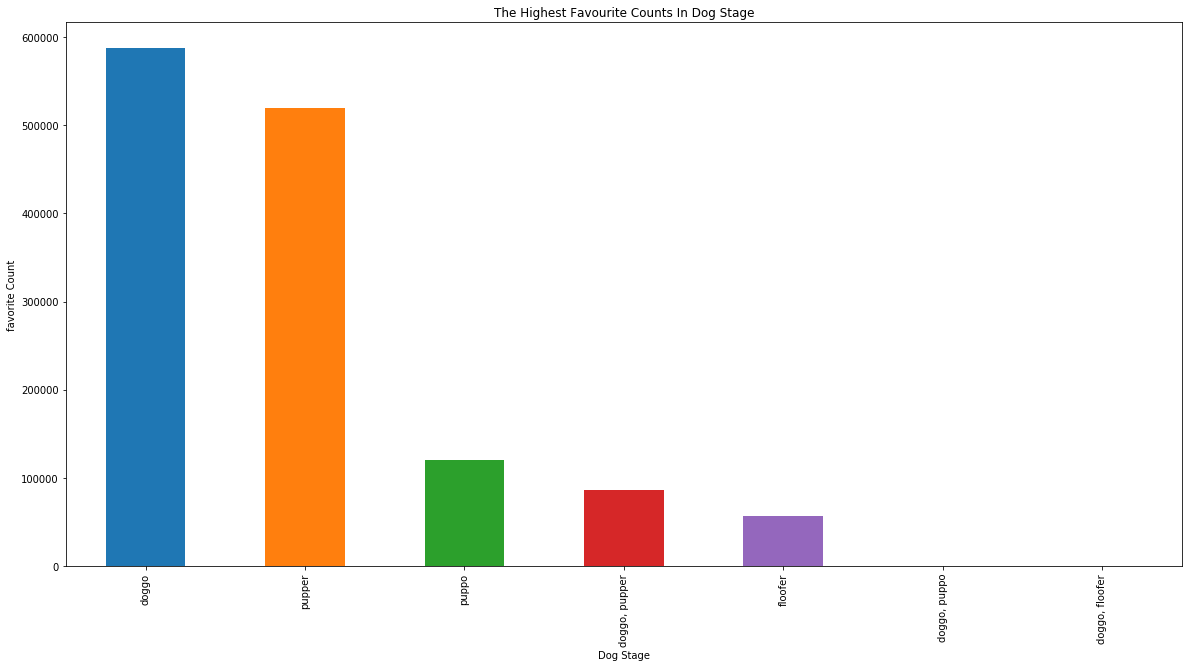

In [78]:
# use bar chart for visualization.

fav_dog_stage.plot(kind='bar', figsize=(20,10)); 

plt.ylabel('favorite Count');                
plt.xlabel('Dog Stage');
plt.title('The Highest Favourite Counts In Dog Stage');

###  Which dog stage has the highest retweets?

In [79]:
# Group dog stage and count retweet_count with sorting.

ret_dog_stage = df.groupby(['dog_stage'])['retweet_count'].sum().sort_values(ascending = False)
ret_dog_stage

dog_stage
doggo             251277.0
pupper            179354.0
puppo              40605.0
doggo, pupper      28945.0
floofer            26960.0
doggo, puppo           0.0
doggo, floofer         0.0
Name: retweet_count, dtype: float64

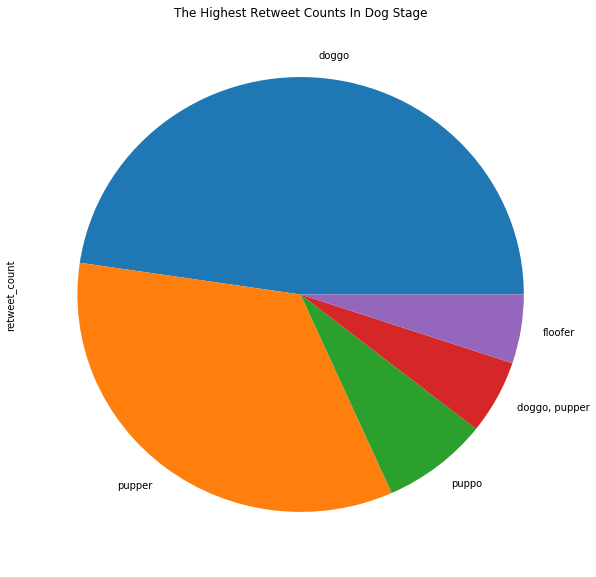

In [80]:
# use bar chart for visualization.

ret_dog_stage.plot(kind='pie', figsize=(10,10)); 

plt.title('The Highest Retweet Counts In Dog Stage');

### What dog stage has the highest rating overall ?

In [81]:
# Group dog stage and count rating_numerator with sorting.
df.groupby(['dog_stage'])['rating_numerator'].sum().sort_values(ascending = False)

dog_stage
pupper            2383.27
doggo              853.00
puppo              276.00
doggo, pupper      111.00
floofer            107.00
doggo, puppo        13.00
doggo, floofer      11.00
Name: rating_numerator, dtype: float64

### What are Top 5 tweet with URLs which has highest rating?

In [82]:
# find the max rating in the column.

df.rating_numerator.max()

14.0

In [83]:
# extract Df with with condition rating_numerator == 14.

top_5 = df[df.rating_numerator == 14]

# Group tweet_id and urls corresponding to favorite_count with sort top 5.

top_5.groupby(['tweet_id','expanded_urls'])['favorite_count'].sum().sort_values(ascending = False).nlargest(5)


tweet_id            expanded_urls                                                                                                                                                                                                                                                  
755206590534418437  https://twitter.com/dog_rates/status/755206590534418437/photo/1,https://twitter.com/dog_rates/status/755206590534418437/photo/1,https://twitter.com/dog_rates/status/755206590534418437/photo/1,https://twitter.com/dog_rates/status/755206590534418437/photo/1    17080.0
794205286408003585  https://twitter.com/dog_rates/status/794205286408003585/photo/1,https://twitter.com/dog_rates/status/794205286408003585/photo/1,https://twitter.com/dog_rates/status/794205286408003585/photo/1                                                                     9714.0
742465774154047488  https://twitter.com/dog_rates/status/742465774154047488/photo/1,https://twitter.com/dog_rates/status/742465774154047488/photo/1   

### What breeds of dogs are most popular?

In [84]:
# Use p1 as best predicition (95% prediction interval)
# count each value in p1 and display top 5.

df.p1.value_counts().nlargest(5)

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
Name: p1, dtype: int64

### Which dog breed  has more favorites ?

In [85]:
# Group dog breed (p1) and count favorites with sorting top5.

df.groupby(['p1'])['favorite_count'].sum().sort_values(ascending = False).nlargest(5)

p1
golden_retriever      612816.0
Labrador_retriever    518514.0
Pembroke              258718.0
chow                  156717.0
Eskimo_dog            147414.0
Name: favorite_count, dtype: float64

### Which dog breed  has more retweets ?

In [86]:
# Group dog breed (p1) and count retweets with sorting top5.
df.groupby(['p1'])['retweet_count'].sum().sort_values(ascending = False).nlargest(5)

p1
golden_retriever      281523.0
Labrador_retriever    232297.0
Pembroke               80695.0
Eskimo_dog             68034.0
Samoyed                64934.0
Name: retweet_count, dtype: float64

### What is the realation between  favorite_count and retweet_count ?

Text(0.5,1,'Favorites & Retweets Correlation')

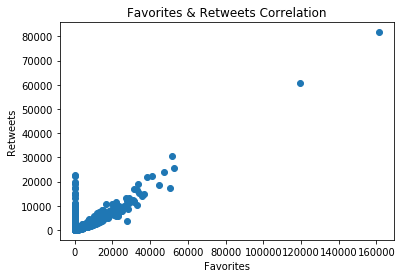

In [87]:
# use scatter plot for visualization.

plt.scatter(df.favorite_count , df.retweet_count )
plt.xlabel('Favorites')
plt.ylabel('Retweets')
plt.title('Favorites & Retweets Correlation')